# 二十二.Python图像傅里叶变换原理及实现!

本节主要讲解图像傅里叶变换的相关内容，在数字图像处理中，有两个经典的变换被广泛应用——傅里叶变换和霍夫变换。其中，傅里叶变换主要是将时间域上的信号转变为频率域上的信号，用来进行图像除噪、图像增强等处理

1.图像傅里叶变换

2.Numpy实现傅里叶变换

3.Numpy实现傅里叶逆变换

4.OpenCV实现傅里叶变换

5.OpenCV实现傅里叶逆变换。


## 22.1.图像傅里叶变换原理

傅里叶变换（Fourier Transform，简称FT）常用于数字信号处理，它的目的是将时间域上的信号转变为频率域上的信号。随着域的不同，对同一个事物的了解角度也随之改变，因此在时域中某些不好处理的地方，在频域就可以较为简单的处理。同时，可以从频域里发现一些原先不易察觉的特征。傅里叶定理指出“任何连续周期信号都可以表示成（或者无限逼近）一系列正弦信号的叠加。”


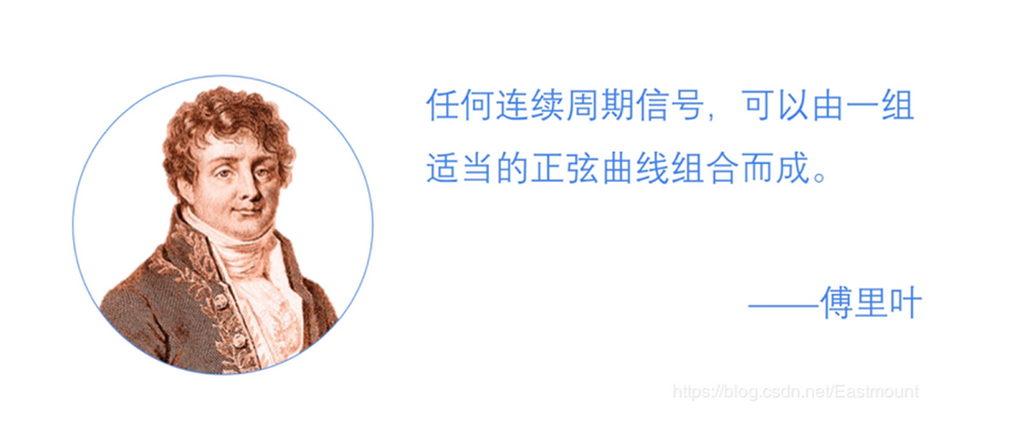

下面引用李老师 “Python+OpenCV图像处理” 中的一个案例。如下图所示，他将某饮料的制作过程的时域角度转换为频域角度。


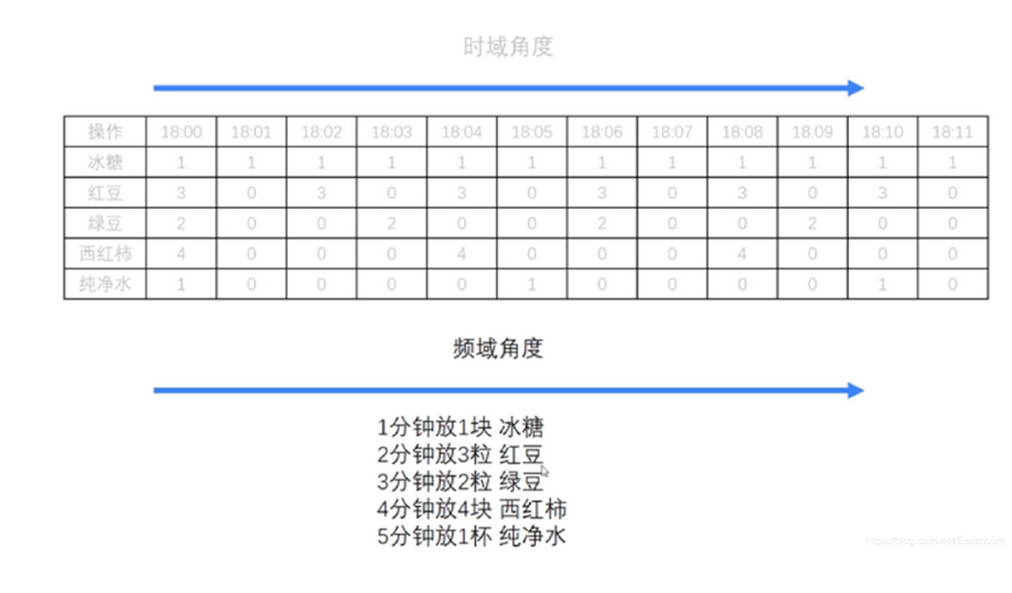

绘制对应的时间图和频率图如下所示：


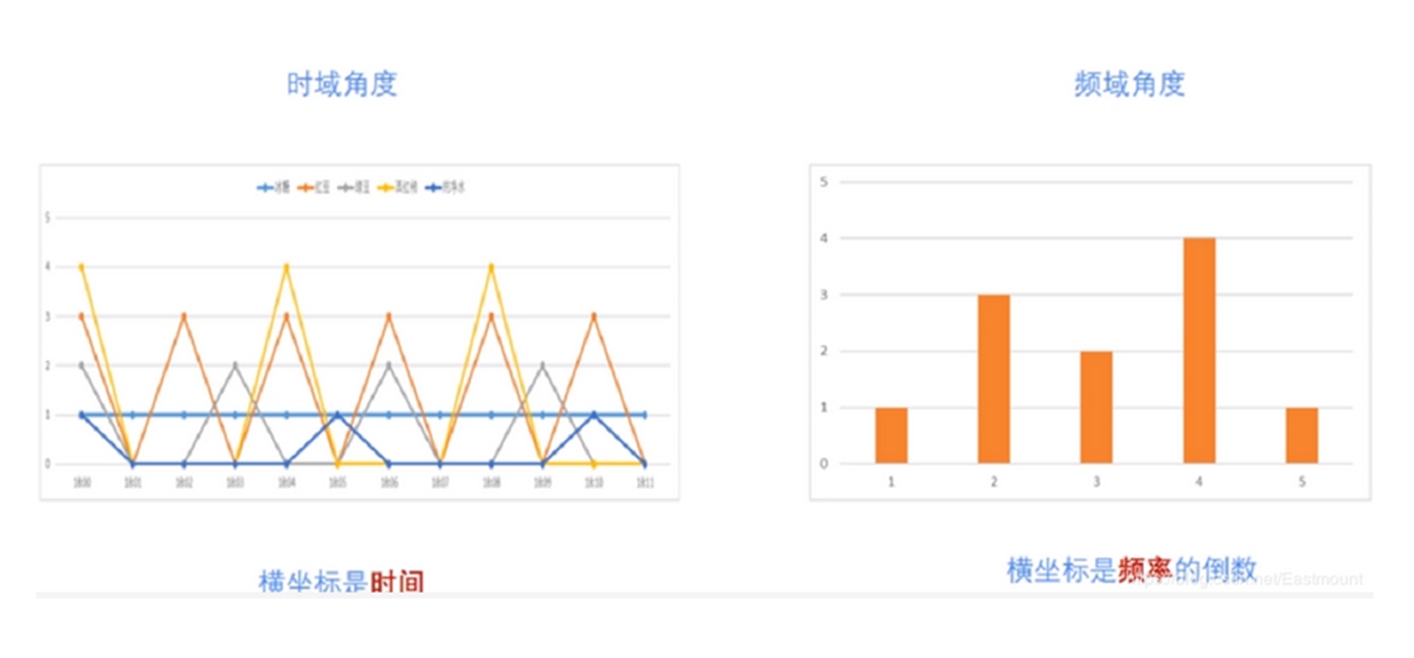

傅里叶公式如下，其中w表示频率，t表示时间，为复变函数。它将时间域的函数表示为频率域的函数f(t)的积分。


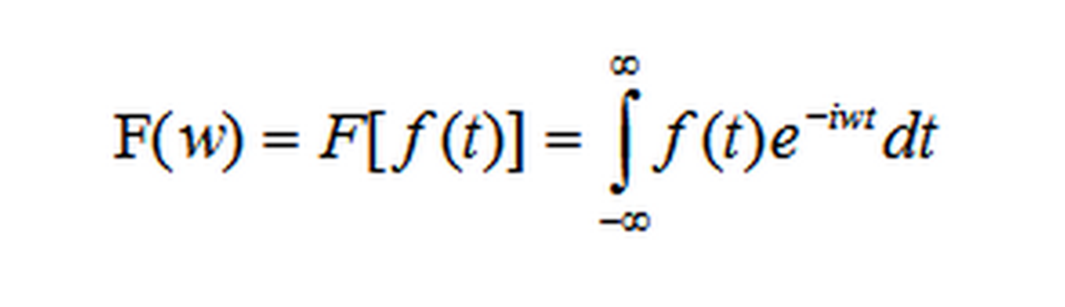

傅里叶变换认为一个周期函数（信号）包含多个频率分量，任意函数（信号）f(t)可通过多个周期函数（或基函数）相加合成。从物理角度理解，傅里叶变换是以一组特殊的函数（三角函数）为正交基，对原函数进行线性变换，物理意义便是原函数在各组基函数的投影。如下图所示，它是由三条正弦曲线组合成。


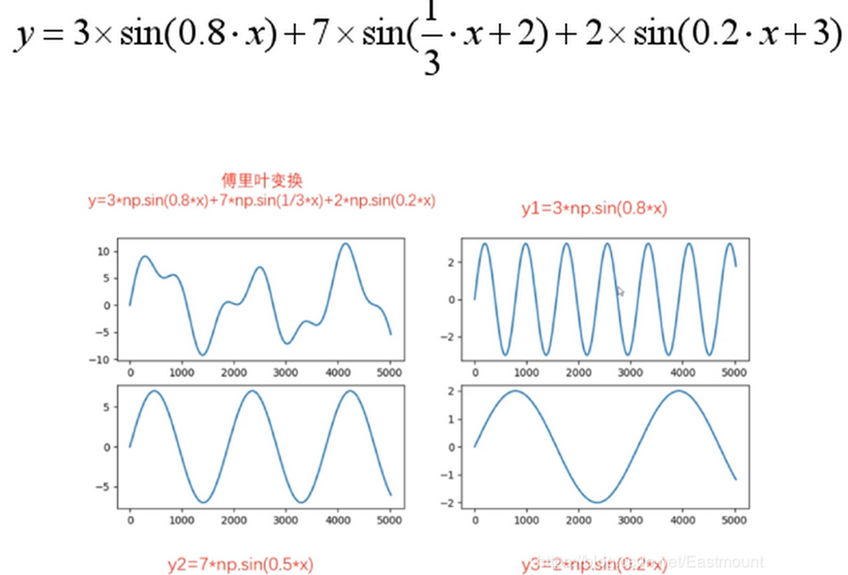

傅里叶变换可以应用于图像处理中，经过对图像进行变换得到其频谱图。从谱频图里频率高低来表征图像中灰度变化剧烈程度。图像中的边缘信号和噪声信号往往是高频信号，而图像变化频繁的图像轮廓及背景等信号往往是低频信号。这时可以有针对性的对图像进行相关操作，例如图像除噪、图像增强和锐化等。二维图像的傅里叶变换可以用以下数学公式（15-3）表达，其中f是空间域（Spatial Domain）)值，F是频域（Frequency Domain）值


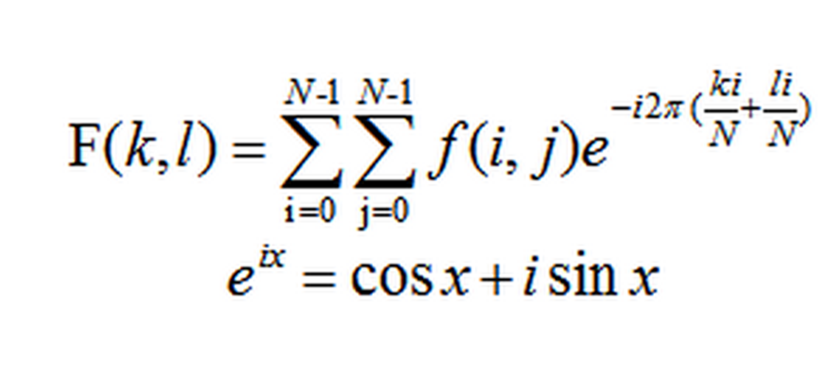

对上面的傅里叶变换有了大致的了解之后，下面通过Numpy和OpenCV分别讲解图像傅里叶变换的算法及操作代码。


## 22.2.Numpy实现傅里叶变换


Numpy中的 FFT包提供了函数 np.fft.fft2()可以对信号进行快速傅里叶变换，其函数原型如下所示，该输出结果是一个复数数组（Complex Ndarry）。fft2(a, s=None, axes=(-2, -1), norm=None)a表示输入图像，阵列状的复杂数组s表示整数序列，可以决定输出数组的大小。输出可选形状（每个转换轴的长度），其中s[0]表示轴0，s[1]表示轴1。对应fit(x,n)函数中的n，沿着每个轴，如果给定的形状小于输入形状，则将剪切输入。如果大于则输入将用零填充。如果未给定’s’，则使用沿’axles’指定的轴的输入形状axes表示整数序列，用于计算FFT的可选轴。如果未给出，则使用最后两个轴。“axes”中的重复索引表示对该轴执行多次转换，一个元素序列意味着执行一维FFTnorm包括None和ortho两个选项，规范化模式（请参见numpy.fft）。


Numpy中的fft模块有很多函数，相关函数如下：


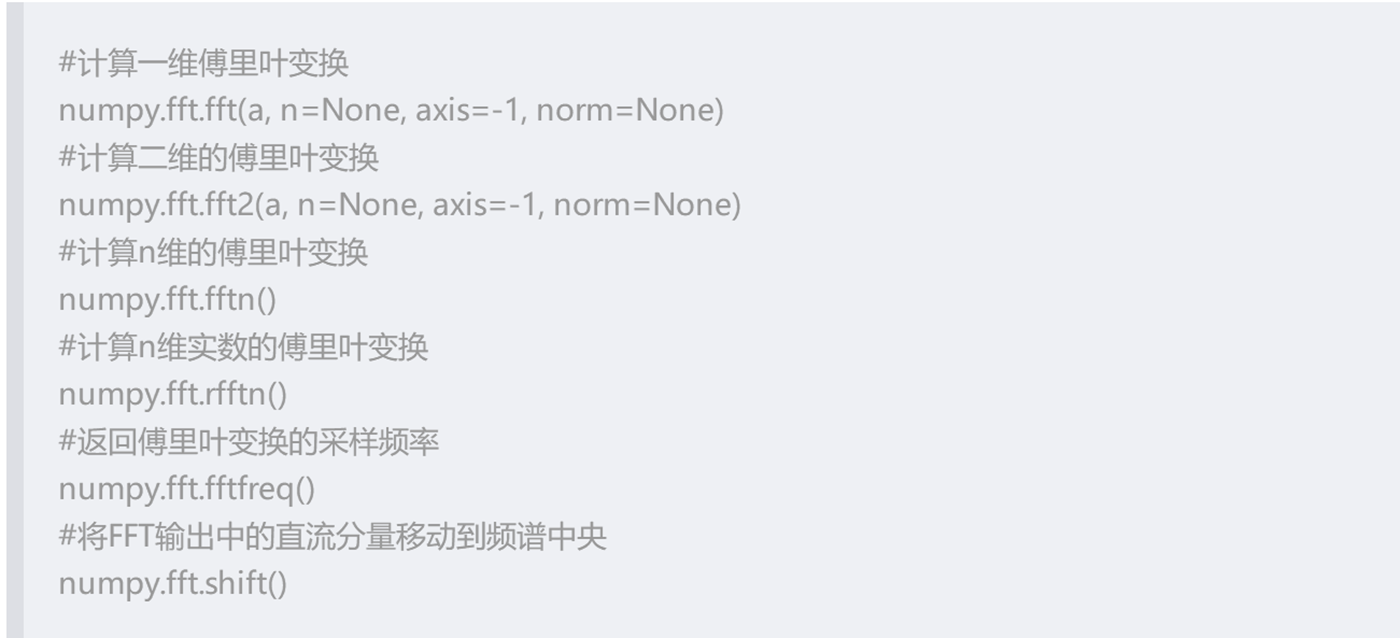

下面的代码是通过Numpy库实现傅里叶
变换，调用np.fft.fft2()快速傅里叶变换
得到频率分布，接着调用np.fft.fftshift()
函数将中心位置转移至中间，最终通
过Matplotlib显示效果图。


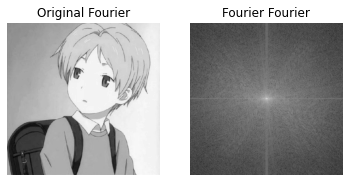

In [1]:
# -*- coding: utf-8 -*-
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#读取图像
img = cv.imread('test.jpg', 0)

#快速傅里叶变换算法得到频率分布
f = np.fft.fft2(img)

#默认结果中心点位置是在左上角,
#调用fftshift()函数转移到中间位置
fshift = np.fft.fftshift(f)       

#fft结果是复数, 其绝对值结果是振幅
fimg = np.log(np.abs(fshift))

#展示结果
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original Fourier')
plt.axis('off')
plt.subplot(122), plt.imshow(fimg, 'gray'), plt.title('Fourier Fourier')
plt.axis('off')
plt.show()



输出结果如图所示，左边为原始图像，右边为频率分布图谱，其中越靠近中心位置频率越低，越亮（灰度值越高）的位置代表该频率的信号振幅越大。


## 22.3.Numpy实现傅里叶逆变换

下面介绍Numpy实现傅里叶逆变换，它是傅里叶变换的逆操作，将频谱图像转换为原始图像的过程。通过傅里叶变换将转换为频谱图，并对高频（边界）和低频（细节）部分进行处理，接着需要通过傅里叶逆变换恢复为原始效果图。频域上对图像的处理会反映在逆变换图像上，从而更好地进行图像处理。图像傅里叶变化主要使用的函数如下所示：


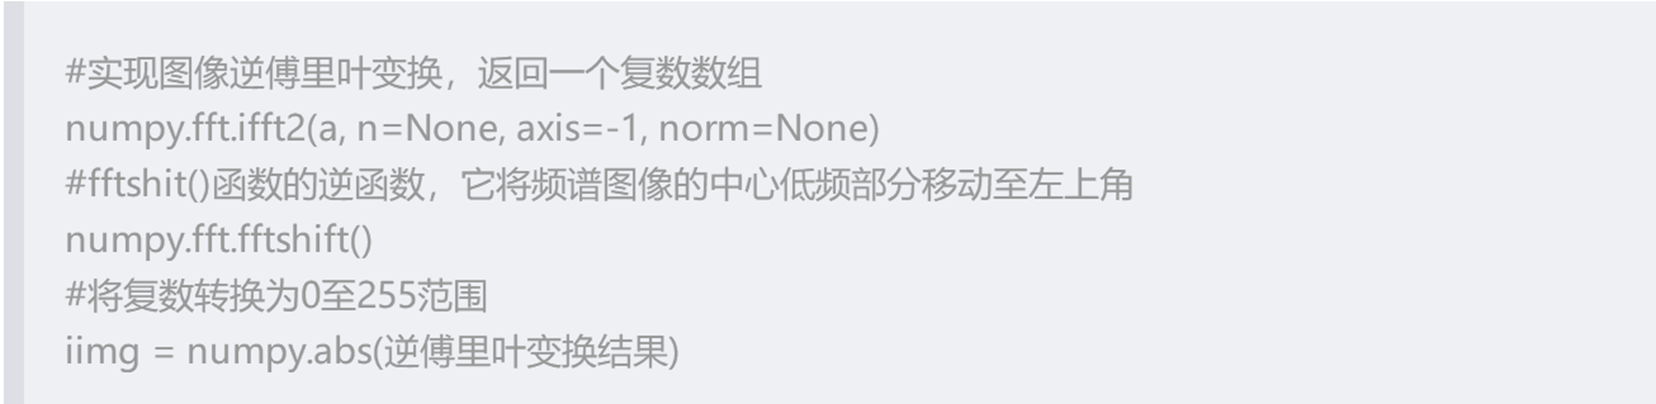

下面的代码分别实现了傅里叶变换和傅里叶逆变换。


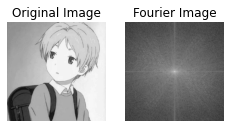

In [7]:
# -*- coding: utf-8 -*-
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#读取图像
img = cv.imread('test.jpg', 0)

#傅里叶变换
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
res = np.log(np.abs(fshift))

#傅里叶逆变换
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

#展示结果
plt.subplot(131), plt.imshow(img, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(132), plt.imshow(res, 'gray'), plt.title('Fourier Image')
plt.axis('off')
# plt.subplot(133), plt.imshow(iimg, 'gray'), plt.title('Inverse Fourier Image')
# plt.axis('off')
plt.show()


输出结果如图所示，从左至右分别为原始图像、频谱图像、逆傅里叶变换转换图像。


## 22.4.OpenCV实现傅里叶变换

OpenCV 中相应的函数是cv2.dft()和用Numpy输出的结果一样，但是是双通道的。第一个通道是结果的实数部分，第二个通道是结果的虚数部分，并且输入图像要首先转换成 np.float32 格式。其函数原型如下所示：

dst = cv2.dft(src, dst=None, flags=None, nonzeroRows=None)

src表示输入图像，需要通过np.float32转换格式

dst表示输出图像，包括输出大小和尺寸

flags表示转换标记，其中DFT _INVERSE执行反向一维或二维转换，而不是默认的正向转换；DFT _SCALE表示缩放结果，由阵列元素的数量除以它；DFT _ROWS执行正向或反向变换输入矩阵的每个单独的行，该标志可以同时转换多个矢量，并可用于减少开销以执行3D和更高维度的转换等；DFT _COMPLEX_OUTPUT执行1D或2D实数组的正向转换，这是最快的选择，默认功能；DFT _REAL_OUTPUT执行一维或二维复数阵列的逆变换，结果通常是相同大小的复数数组，但如果输入数组具有共轭复数对称性，则输出为真实数组
nonzeroRows表示当参数不为零时，函数假定只有nonzeroRows输入数组的第一行（未设置）或者只有输出数组的第一个（设置）包含非零，因此函数可以处理其余的行更有效率，并节省一些时间；这种技术对计算阵列互相关或使用DFT卷积非常有用


注意，由于输出的频谱结果是一个复数，需要调用cv2.magnitude()函数将傅里叶变换的双通道结果转换为0到255的范围。其函数原型如下：

cv2.magnitude(x, y)

x表示浮点型X坐标值，即实部

y表示浮点型Y坐标值，即虚部

最终输出结果为幅值，即：


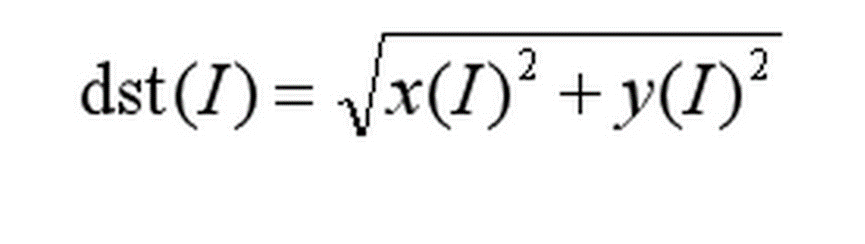

完整代码如下所示：


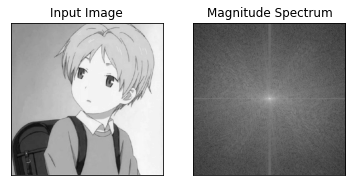

In [10]:
import numpy as np

import cv2

from matplotlib import pyplot as plt

img=cv2.imread('test.jpg',0)#将图像转换成灰度图

dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)#进行傅里叶变换

dft_shift=np.fft.fftshift(dft)#将频率为零的部分转移到中心位置

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))#公式

plt.subplot(121),plt.imshow(img, cmap = 'gray')

plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')

plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()



输出结果如图所示，左边为原图，右边为转换后的频谱图像，并且保证低频位于中心位置。


## 22.5.OpenCV实现傅里叶逆变换

在OpenCV 中，通过函数cv2.idft()实现傅里叶逆变换，其返回结果取决于原始图像的类型和大小，原始图像可以为实数或复数。其函数原型如下所示：

dst = cv2.idft(src[, dst[, flags[, nonzeroRows]]])

src表示输入图像，包括实数或复数dst表示输出图像flags表示转换标记nonzeroRows表示要处理的dst行数，其余行的内容未定义（请参阅dft描述中的卷积示例）完整代码如下所示：


在OpenCV 中，通过函数cv2.idft()实现傅里
叶逆变换，其返回结果取决于原始图像的
类型和大小，原始图像可以为实数或复数。
其函数原型如下所示：

dst = cv2.idft(src[, dst[, flags[, nonzeroRows]]])

src表示输入图像，包括实数或复数dst表示输
出图像flags表示转换标记nonzeroRows表示
要处理的dst行数，其余行的内容未定义（请
参阅dft描述中的卷积示例）完整代码如下所示：


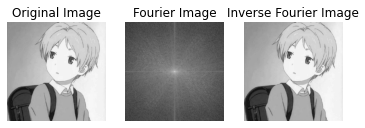

In [11]:
# -*- coding: utf-8 -*-
import numpy as np
import cv2
from matplotlib import pyplot as plt

#读取图像
img = cv2.imread('test.jpg', 0)

#傅里叶变换
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dftshift = np.fft.fftshift(dft)
res1= 20*np.log(cv2.magnitude(dftshift[:,:,0], dftshift[:,:,1]))

#傅里叶逆变换
ishift = np.fft.ifftshift(dftshift)
iimg = cv2.idft(ishift)
res2 = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])

#显示图像
plt.subplot(131), plt.imshow(img, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(132), plt.imshow(res1, 'gray'), plt.title('Fourier Image')
plt.axis('off')
plt.subplot(133), plt.imshow(res2, 'gray'), plt.title('Inverse Fourier Image')
plt.axis('off')
plt.show()


输出结果如图所示，第一幅图为原始“Lena”图，第二幅图为傅里叶变换后的频谱图像，第三幅图为傅里叶逆变换，频谱图像转换为原始图像的过程。
